In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [260]:
df = pd.read_csv("C:\\Users\\patil\\Downloads\\iis-data.csv")
data = df.copy()
df.head(10)

,Sample,Moisture,Temperature,Weather,Pump
0,38,34,26,Sunny,1
1,71,40,26,Sunny,1
2,35,31,26,Cloudy,1
3,90,43,26,Rainy,0
4,33,30,26,Cloudy,1
5,31,34,29,Sunny,1
6,28,37,27,Sunny,1
7,59,39,27,Sunny,1
8,54,37,27,Cloudy,1
9,23,43,25,Rainy,0


In [261]:
df.shape

(1500, 5)

In [262]:
df.drop(columns=["Sample"], inplace=True)

In [264]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Moisture     1500 non-null   int64 
 1   Temperature  1500 non-null   int64 
 2   Weather      1500 non-null   object
 3   Pump         1500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 47.0+ KB
None


In [265]:
print(df.isnull().sum())

Moisture       0
Temperature    0
Weather        0
Pump           0
dtype: int64


In [266]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Moisture: [34 40 31 43 30 37 39 44 36 41 35 42 38 45 33 32 28 29]
Temperature: [26 29 27 25 28 30]
Weather: ['Sunny' 'Cloudy' 'Rainy']
Pump: [1 0]


<Axes: xlabel='Moisture', ylabel='Weather'>

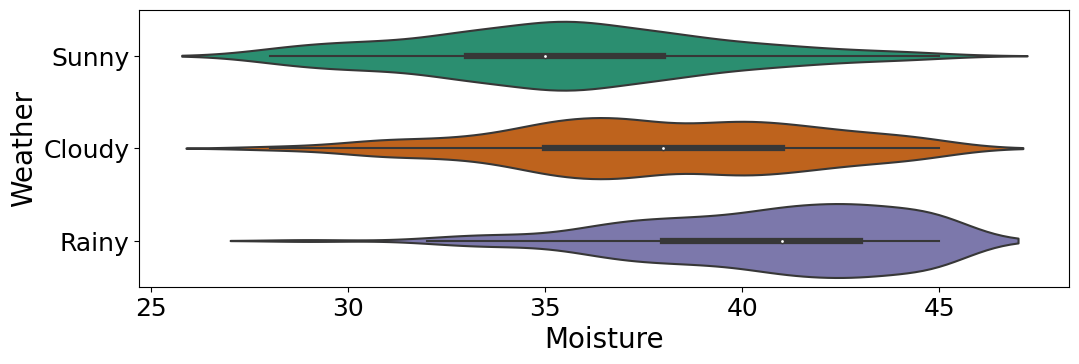

In [267]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Moisture', y='Weather', inner='box', palette='Dark2')

c:\Users\patil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


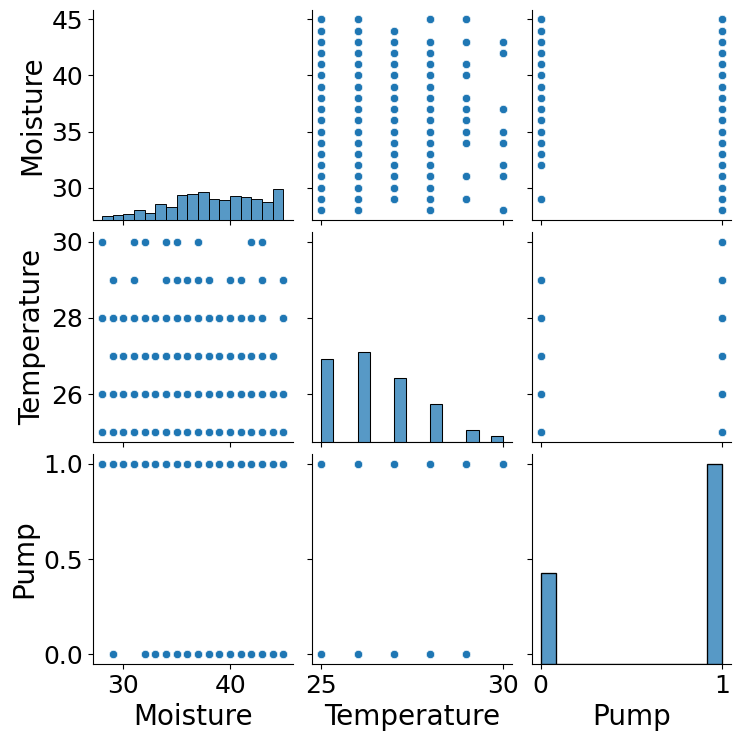

In [268]:
sns.pairplot(df)
plt.show()

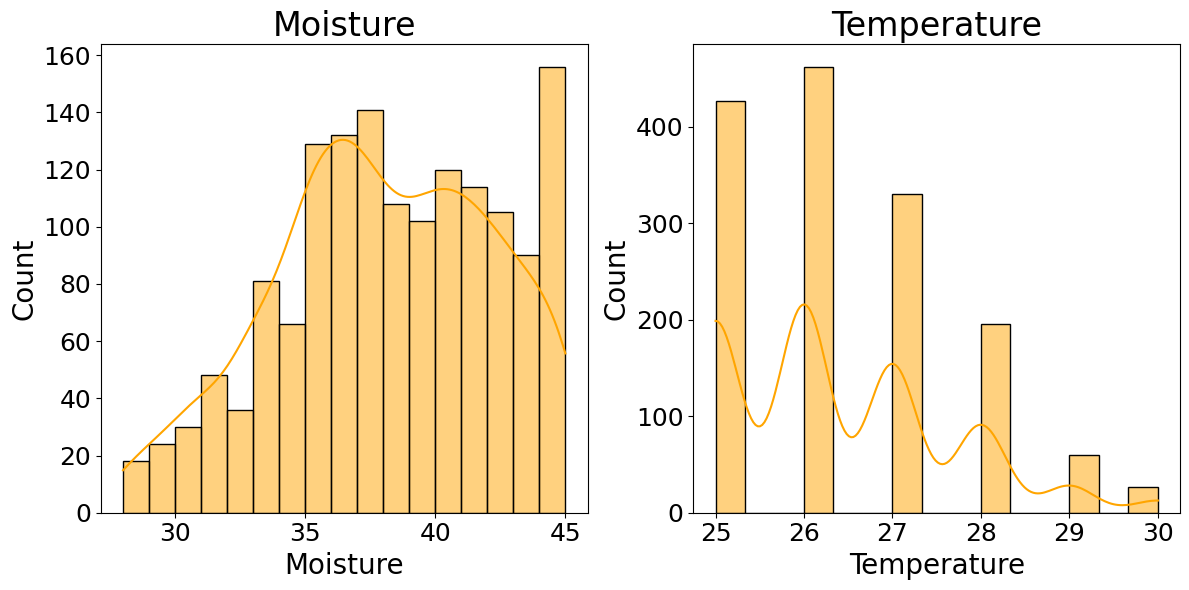

In [269]:

plt.figure(figsize=(12, 6))
for i, col in enumerate(df.drop(columns=["Pump", "Weather"])):
  plt.subplot(1,2,i+1)
  sns.histplot(df[col], kde=True, color="orange")
  plt.title(col)

plt.tight_layout()
plt.show()

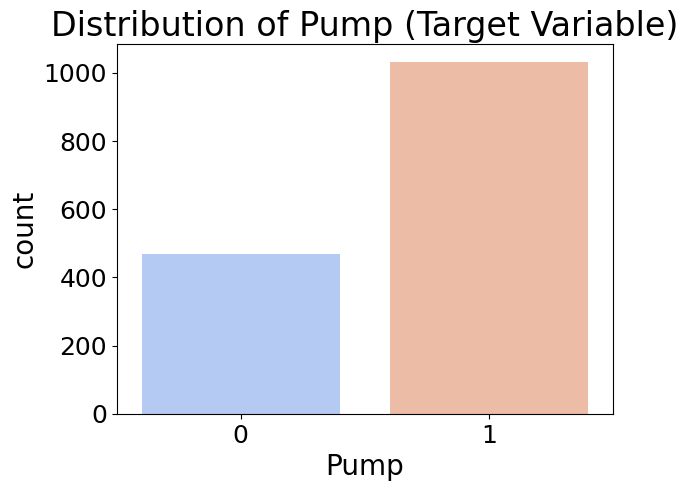

In [270]:
sns.countplot(x="Pump", data=df, palette="coolwarm")
plt.title("Distribution of Pump (Target Variable)")
plt.show()


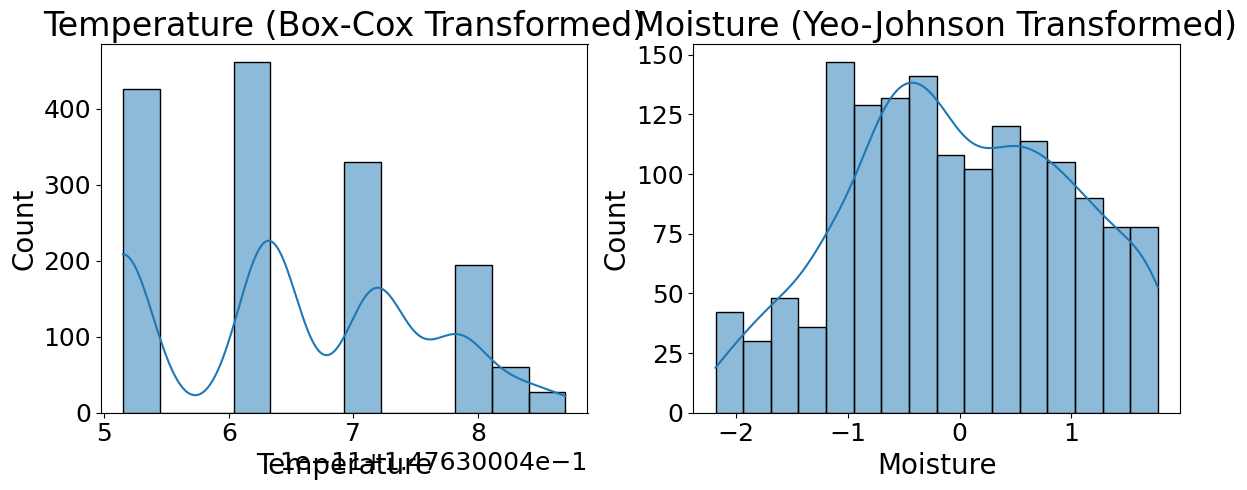

In [271]:
from sklearn.preprocessing import PowerTransformer
from scipy import stats

if (df["Temperature"] <= 0).any():
    df["Temperature"], _ = stats.yeojohnson(df["Temperature"])
    temp_transform = "Yeo-Johnson"
else:
    df["Temperature"], _ = stats.boxcox(df["Temperature"])
    temp_transform = "Box-Cox"

yeo_johnson = PowerTransformer(method="yeo-johnson")
df["Moisture"] = yeo_johnson.fit_transform(df[["Moisture"]])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Temperature"], kde=True)
plt.title(f"Temperature ({temp_transform} Transformed)")

plt.subplot(1, 2, 2)
sns.histplot(df["Moisture"], kde=True)
plt.title("Moisture (Yeo-Johnson Transformed)")

plt.tight_layout()
plt.show()

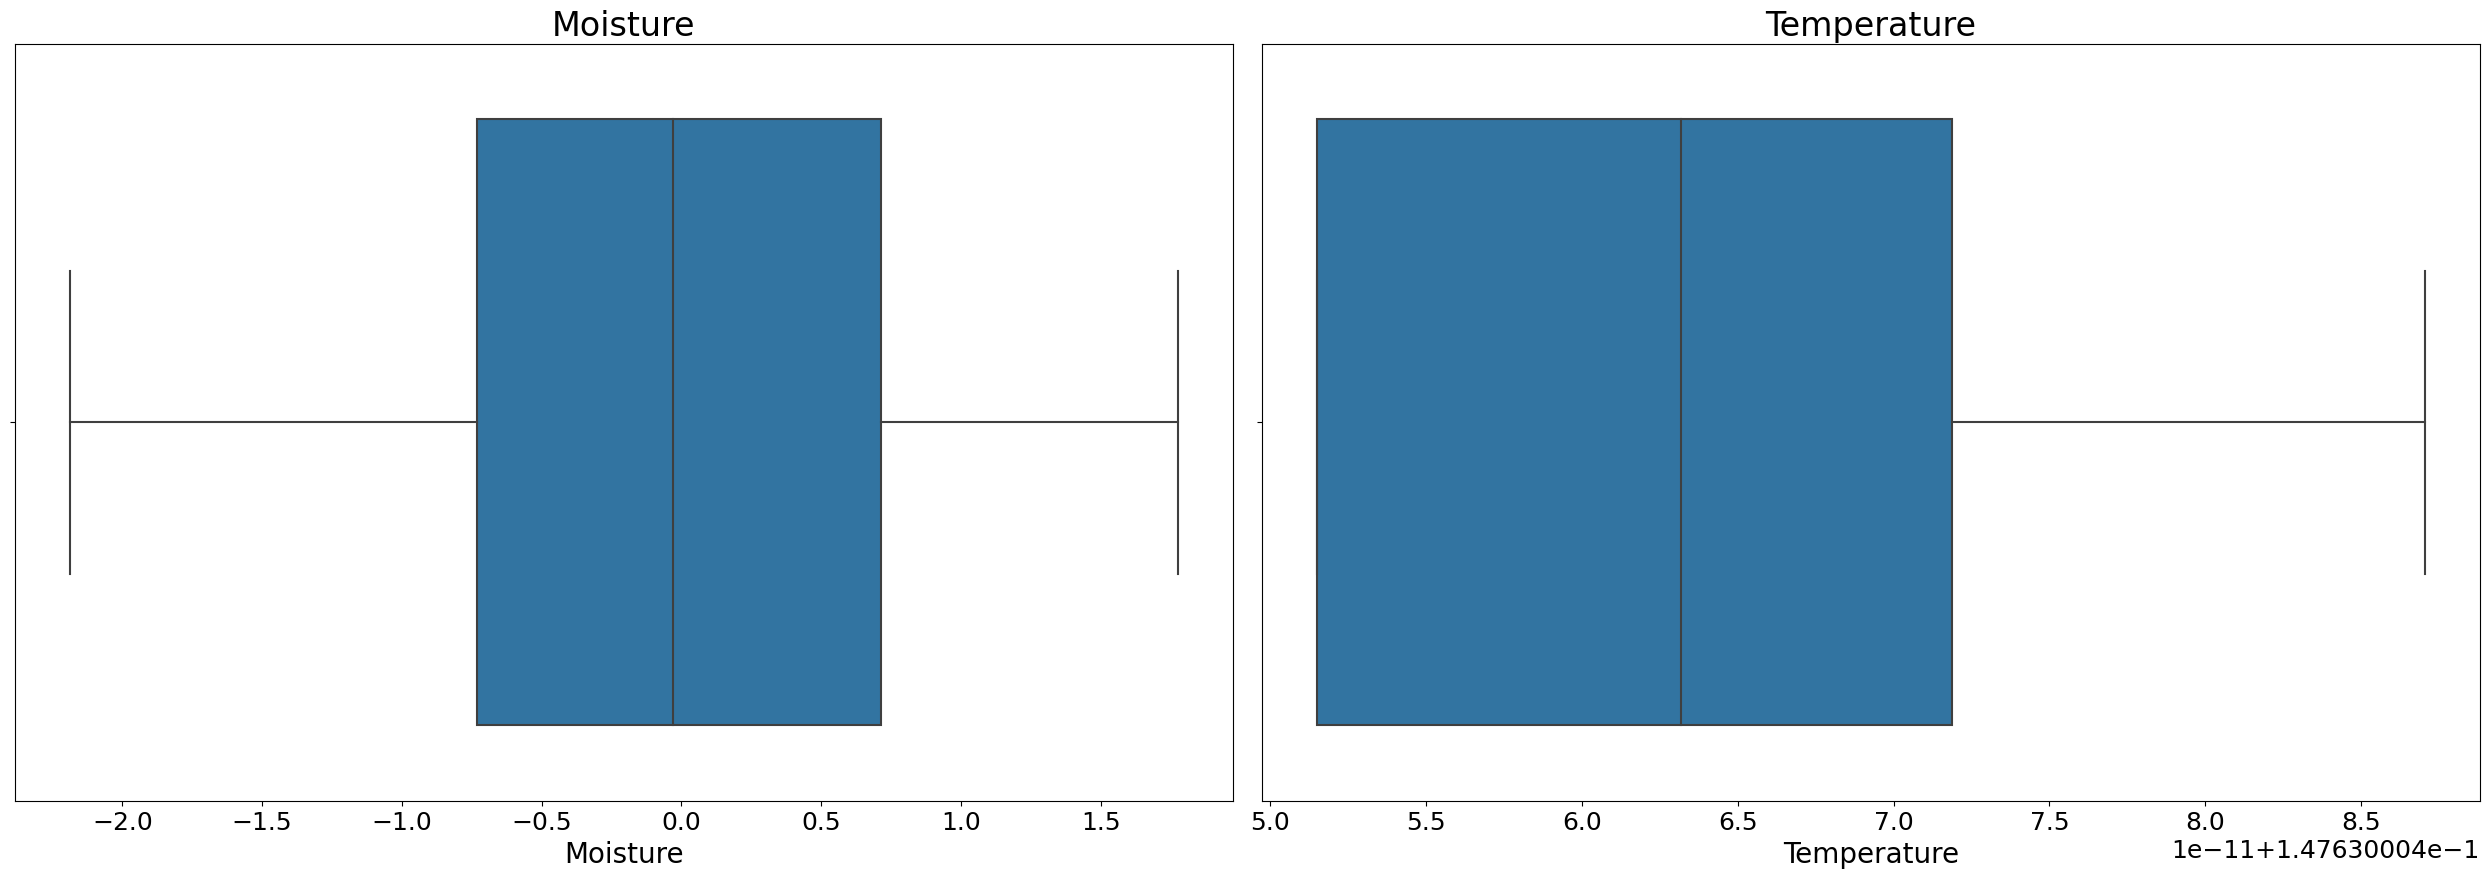

In [273]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(df.drop(columns=["Pump", "Weather"])):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

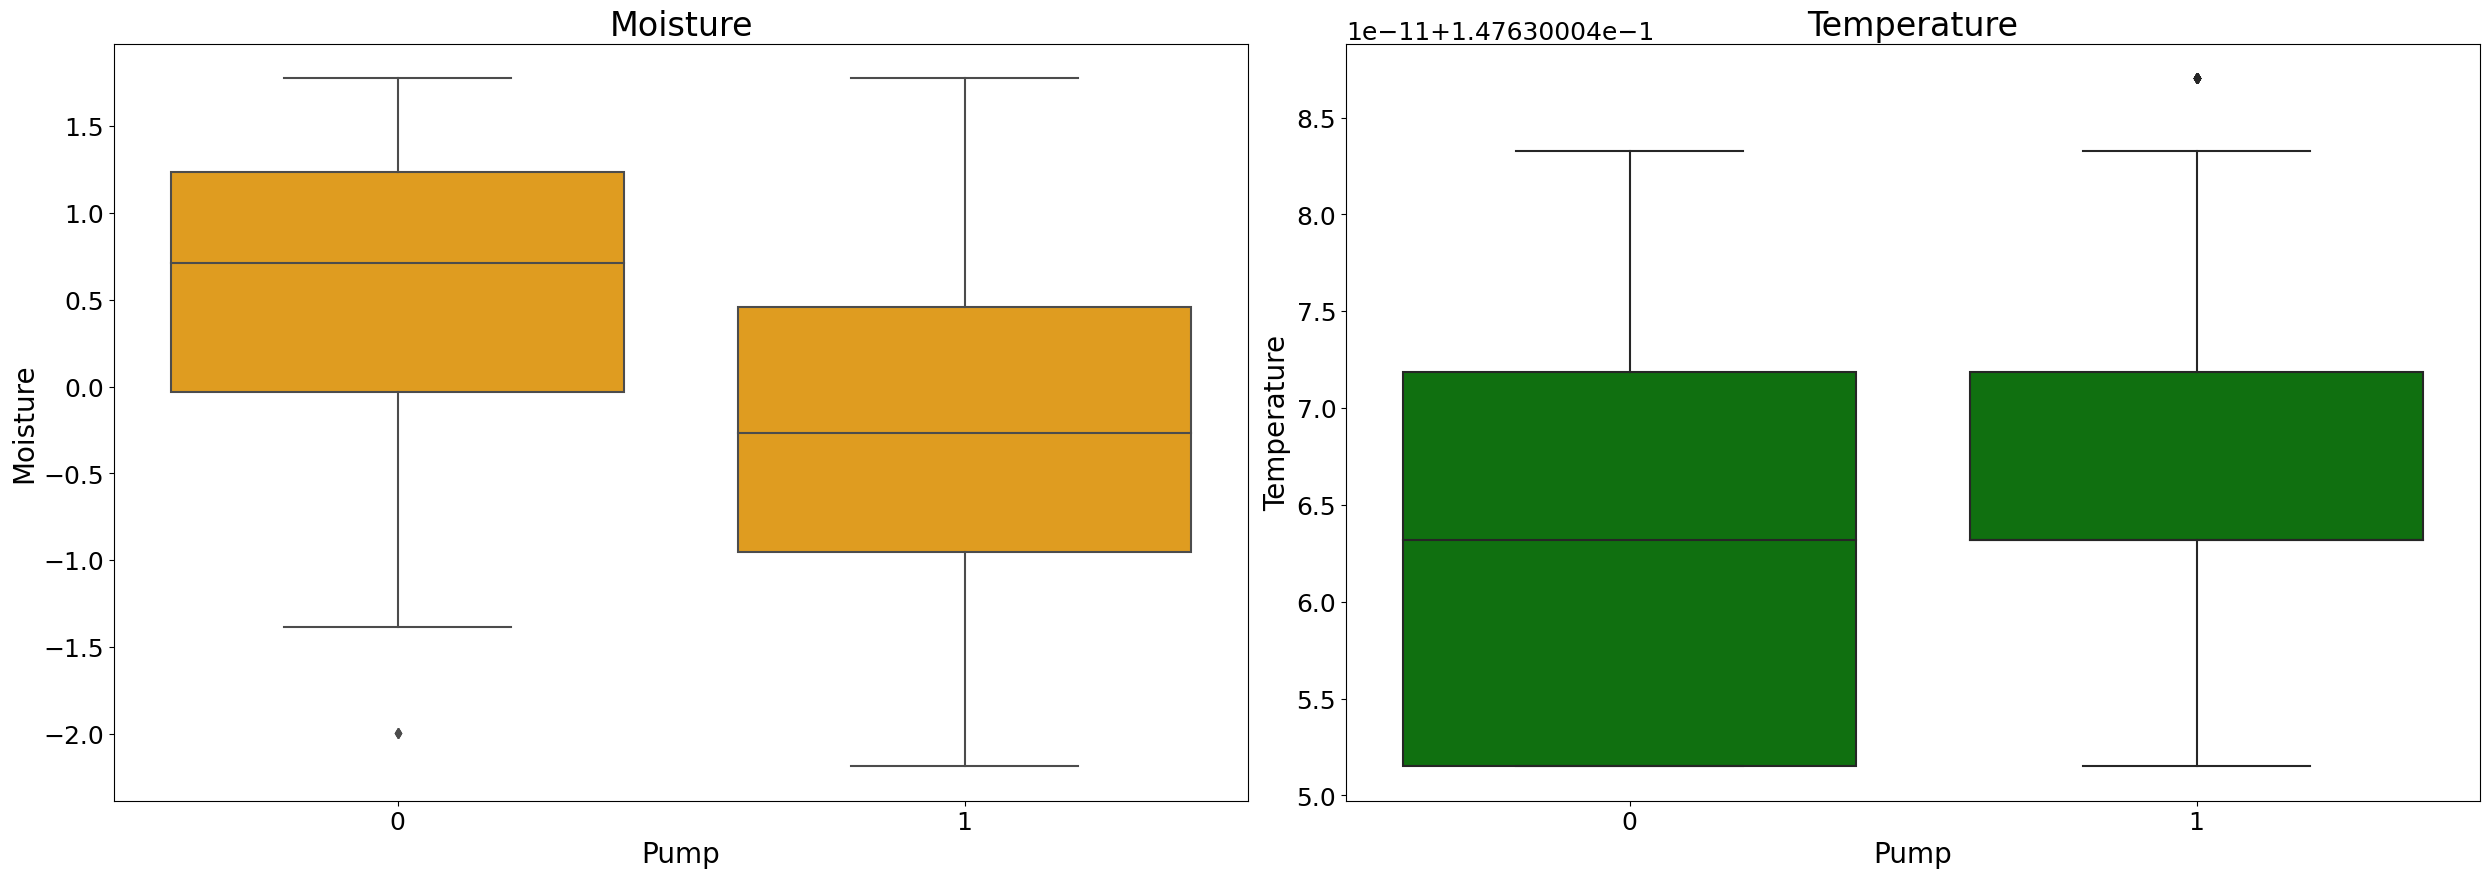

In [274]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))

color = ["orange", "green"]
for i, col in enumerate(df.drop(columns=["Pump", "Weather"])):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df["Pump"], y=df[col], color=color[i])
    plt.title(col)

plt.tight_layout()
plt.show()


In [275]:
# Feature selection and preprocessing
X = data[["Moisture", "Temperature", "Weather"]]
y = data["Pump"]

In [276]:
Q1 = df.groupby("Pump")["Temperature"].quantile(0.25)
Q3 = df.groupby("Pump")["Temperature"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df.groupby("Pump").apply(
    lambda group: group[(group["Temperature"] < lower_bound[group.name]) |
                        (group["Temperature"] > upper_bound[group.name])]
).reset_index(drop=True)

print(outliers)

# Encode categorical 'weather' feature

    Moisture  Temperature Weather  Pump
0  -0.730906      0.14763  Cloudy     1
1   0.972080      0.14763  Cloudy     1
2  -0.269215      0.14763  Cloudy     1
3  -0.954185      0.14763  Cloudy     1
4  -1.593427      0.14763  Cloudy     1
5  -1.385475      0.14763  Cloudy     1
6  -1.593427      0.14763  Cloudy     1
7  -2.186134      0.14763  Cloudy     1
8   1.235073      0.14763  Cloudy     1
9  -0.730906      0.14763  Cloudy     1
10  0.972080      0.14763  Cloudy     1
11 -0.269215      0.14763  Cloudy     1
12 -0.954185      0.14763  Cloudy     1
13 -1.593427      0.14763  Cloudy     1
14 -1.385475      0.14763  Cloudy     1
15 -1.593427      0.14763  Cloudy     1
16 -2.186134      0.14763  Cloudy     1
17  1.235073      0.14763  Cloudy     1
18 -0.730906      0.14763  Cloudy     1
19  0.972080      0.14763  Cloudy     1
20 -0.269215      0.14763  Cloudy     1
21 -0.954185      0.14763  Cloudy     1
22 -1.593427      0.14763  Cloudy     1
23 -1.385475      0.14763  Cloudy     1


In [277]:
Q1_m = df.groupby("Pump")["Moisture"].quantile(0.25)
Q3_m = df.groupby("Pump")["Moisture"].quantile(0.75)
IQR_m = Q3_m - Q1_m

lower_bound_m = Q1_m - 1.5 * IQR_m
upper_bound_m = Q3_m + 1.5 * IQR_m

outliers_m = df.groupby("Pump").apply(
    lambda group: group[(group["Moisture"] < lower_bound_m[group.name]) |
                        (group["Moisture"] > upper_bound_m[group.name])]
).reset_index(drop=True)

print(outliers_m)

   Moisture  Temperature Weather  Pump
0 -1.993789      0.14763   Rainy     0
1 -1.993789      0.14763   Rainy     0
2 -1.993789      0.14763   Rainy     0


In [299]:
# Create boolean masks for values within bounds
temp_mask = (df["Temperature"] >= df["Pump"].map(lower_bound)) & (df["Temperature"] <= df["Pump"].map(upper_bound))
moisture_mask = (df["Moisture"] >= df["Pump"].map(lower_bound_m)) & (df["Moisture"] <= df["Pump"].map(upper_bound_m))

# Combine both masks
valid_mask = temp_mask & moisture_mask

# Apply mask directly to df (in-place removal of outliers)
df = df[valid_mask].reset_index(drop=True)


In [279]:

# Outlier detection and removal
Q1 = X[["Moisture", "Temperature"]].quantile(0.25)
Q3 = X[["Moisture", "Temperature"]].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Store outlier limits
outlier_limits = {
    'lower_moisture': lower_limit["Moisture"],
    'upper_moisture': upper_limit["Moisture"],
    'lower_temperature': lower_limit["Temperature"],
    'upper_temperature': upper_limit["Temperature"]
}



# Remove outliers
X = X[
    (X["Moisture"] >= lower_limit["Moisture"]) & (X["Moisture"] <= upper_limit["Moisture"]) &
    (X["Temperature"] >= lower_limit["Temperature"]) & (X["Temperature"] <= upper_limit["Temperature"])
]
y = y[X.index]


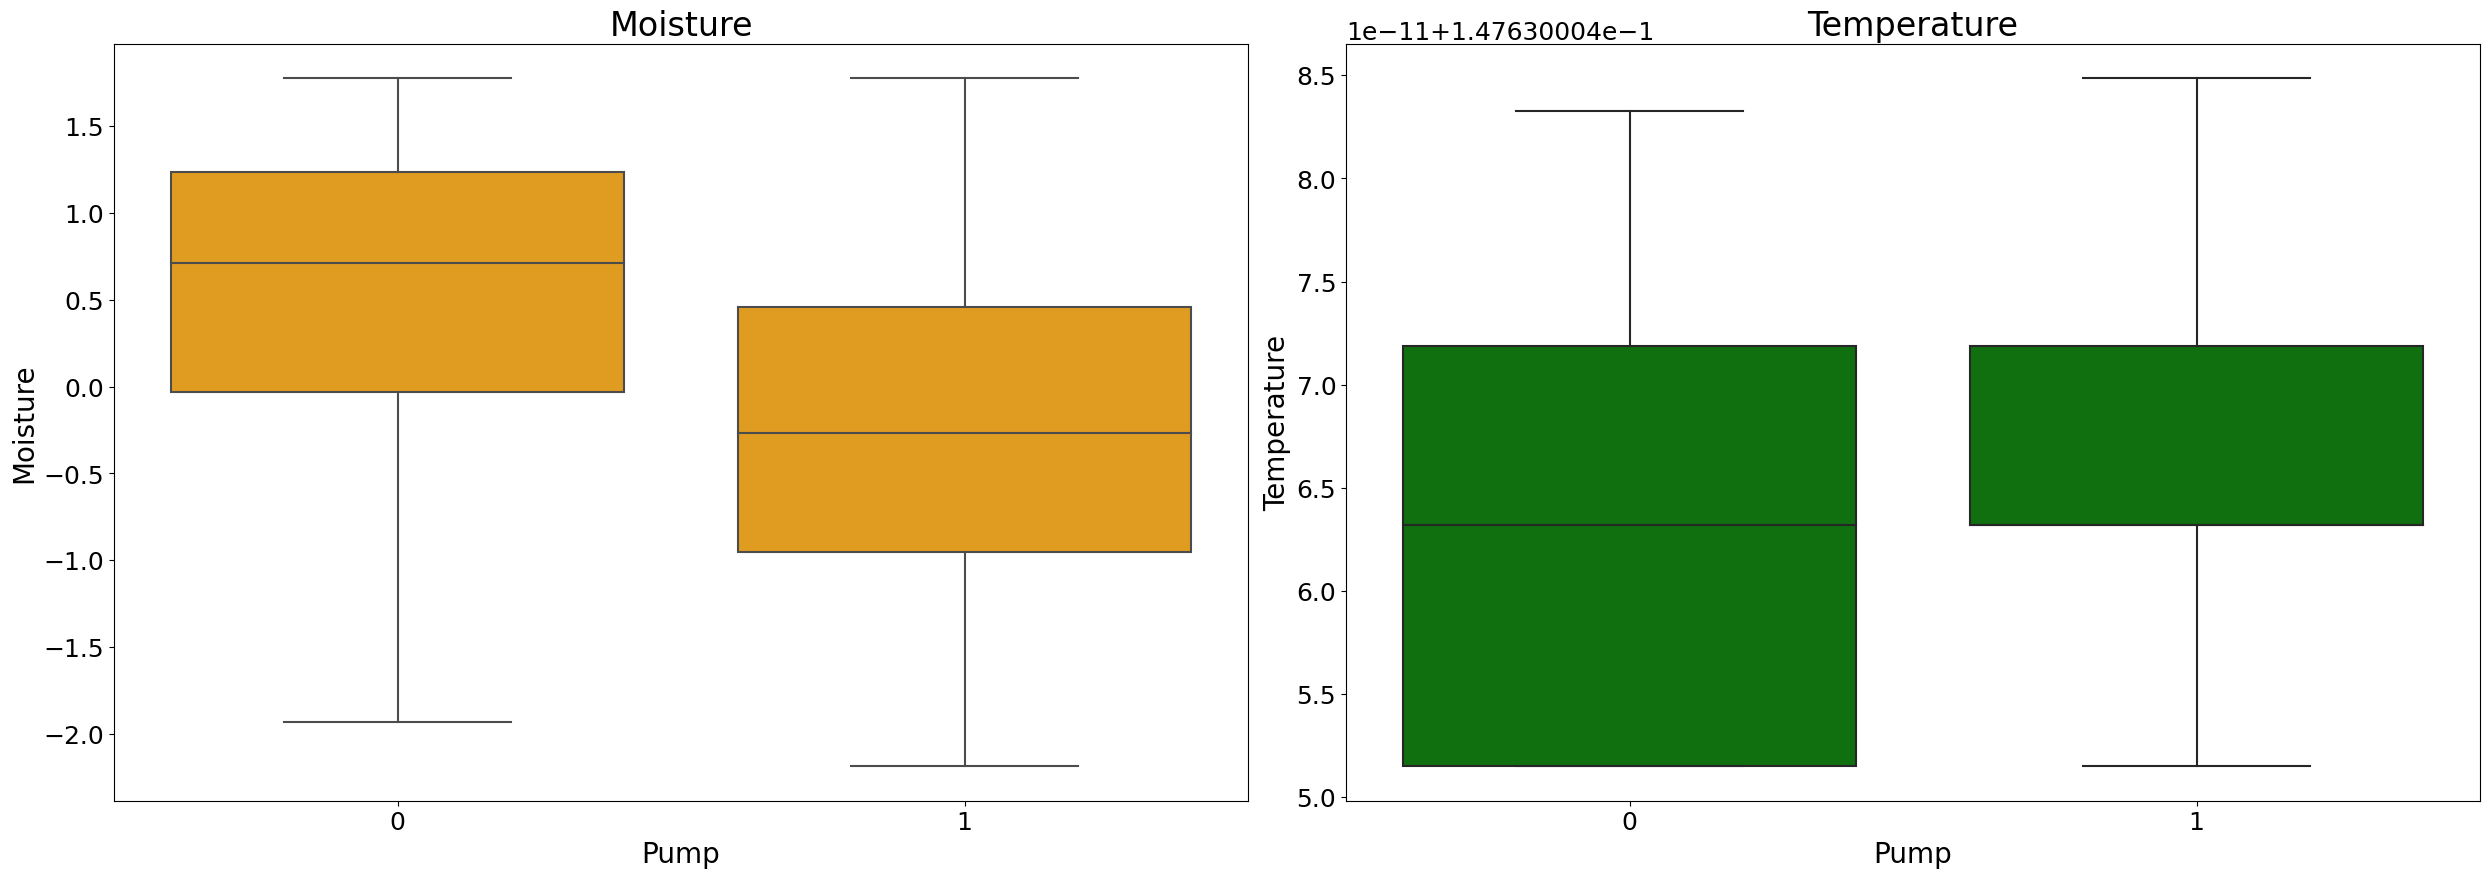

In [300]:
plt.figure(figsize=(25, 25))

color = ["orange", "green"]
for i, col in enumerate(df.drop(columns=["Pump", "Weather"])):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df["Pump"], y=df[col], color=color[i])
    plt.title(col)

plt.tight_layout()
plt.show()


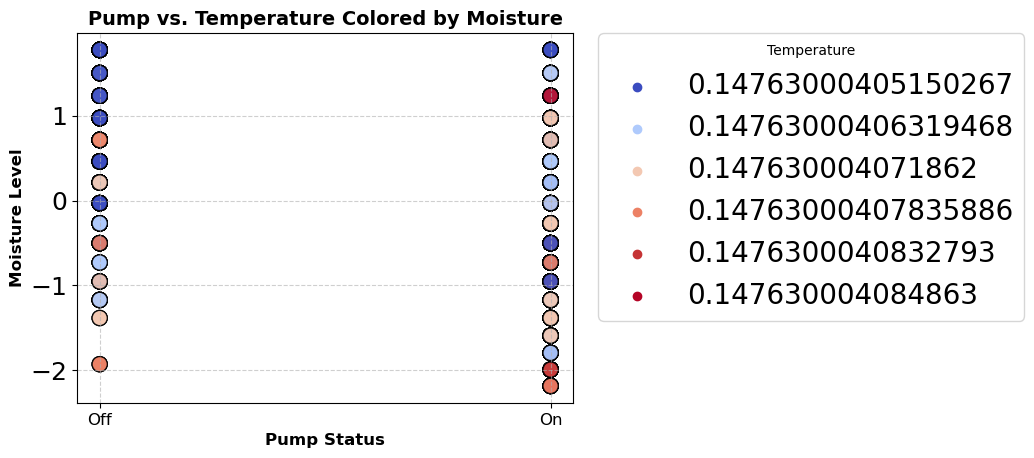

In [281]:
scatter = sns.scatterplot(
    x='Pump', y='Moisture', hue='Temperature', data=df,
    palette='coolwarm', s=120, edgecolor="black", alpha=0.9
)

plt.title('Pump vs. Temperature Colored by Moisture', fontsize=14, fontweight='bold')
plt.xlabel("Pump Status", fontsize=12, fontweight='bold')
plt.ylabel("Moisture Level", fontsize=12, fontweight='bold')
plt.xticks([0, 1], labels=["Off", "On"], fontsize=12)
plt.legend(title="Temperature", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [284]:
scaler = StandardScaler()
X[["Moisture", "Temperature"]] = scaler.fit_transform(X[["Moisture", "Temperature"]])

In [285]:
X.head()

,Moisture,Temperature,Weather
0,-0.940829,-0.314559,Sunny
1,0.489727,-0.314559,Sunny
2,-1.656107,-0.314559,Cloudy
3,1.205005,-0.314559,Rainy
4,-1.894533,-0.314559,Cloudy


In [288]:
le = LabelEncoder()
df["Weather"] = le.fit_transform(df["Weather"])  
X["Weather"] = le.fit_transform(X["Weather"])
X.head()

,Moisture,Temperature,Weather
0,-0.940829,-0.314559,2
1,0.489727,-0.314559,2
2,-1.656107,-0.314559,0
3,1.205005,-0.314559,1
4,-1.894533,-0.314559,0


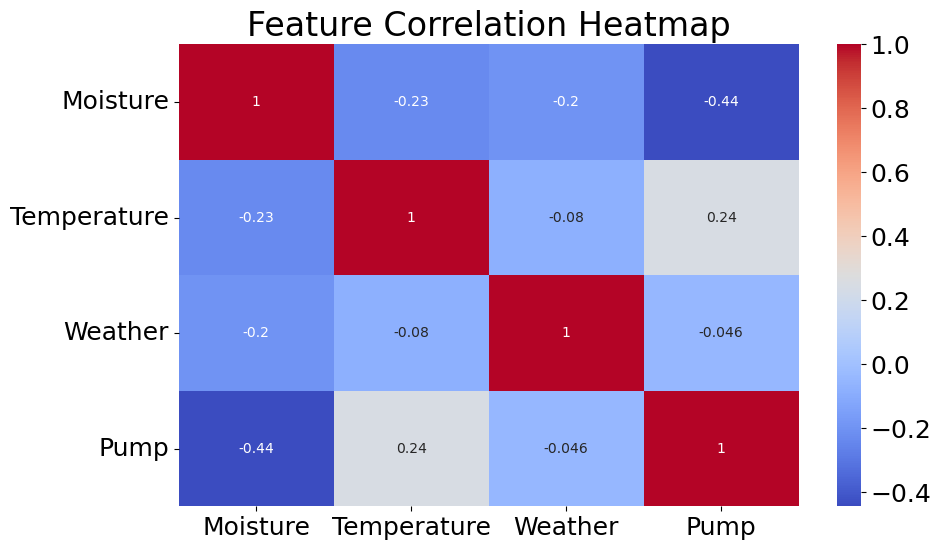

In [289]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\patil\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x500 with 0 Axes>

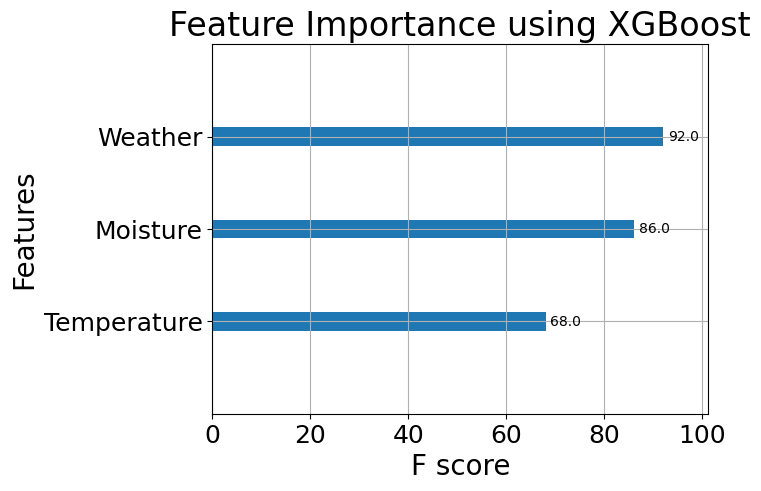

✅ XGBoost Accuracy: 0.96


In [291]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(
    n_estimators=200, 
    learning_rate=0.05,   
    max_depth=2,        
    min_child_weight=3,     
    gamma=0.2,          
    subsample=0.1,        
    colsample_bytree=0.5,   
    objective="binary:logistic", 
    eval_metric="logloss",   
    random_state=42,
    use_label_encoder=True
)
xgb_model.fit(X_train, y_train)

# Feature Importance
plt.figure(figsize=(10, 5))
xgb.plot_importance(xgb_model)
plt.title("Feature Importance using XGBoost")
plt.show()


y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Accuracy: {accuracy:.2f}")


c:\Users\patil\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


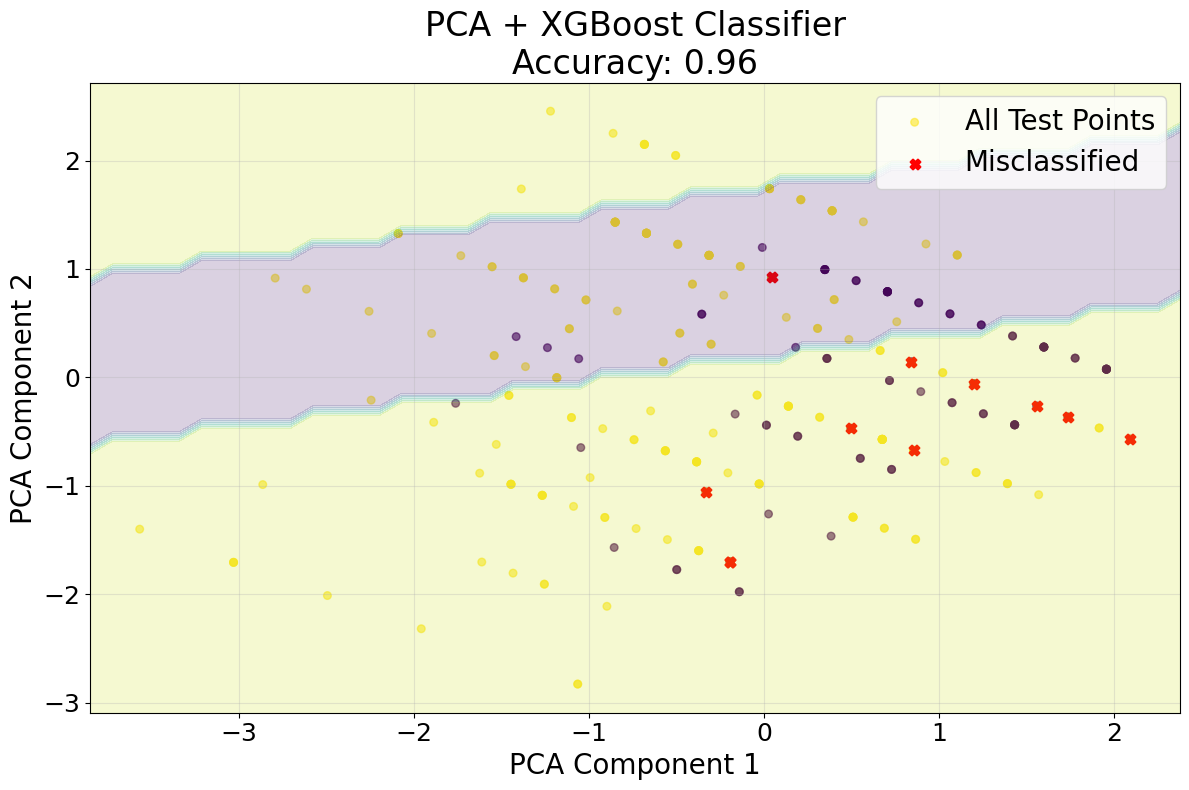

In [292]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import xgboost as xgb

# --- PCA to 2D ---
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# --- XGBoost Classifier ---
xgb_model = xgb.XGBClassifier(
    n_estimators=200, 
    learning_rate=0.05,   
    max_depth=2,        
    min_child_weight=3,     
    gamma=0.2,          
    subsample=0.1,        
    colsample_bytree=0.5,   
    objective="binary:logistic", 
    eval_metric="logloss",   
    random_state=42,
    use_label_encoder=True
)
xgb_model.fit(X_train, y_train)

# --- Predict on PCA test data ---
y_pred_xgb = xgb_model.predict(X_test)

# --- PCA Transform Test for Plot ---
X_test_pca = pca.transform(X_test)

# --- Plotting ---
plt.figure(figsize=(12, 8))

# All test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test, cmap='viridis',
            alpha=0.6, s=30, label='All Test Points')

# Misclassified points
misclassified = y_pred_xgb != y_test
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
            c='red', marker='X', s=50, linewidths=1.5, label='Misclassified')

# Decision boundary
xx, yy = np.meshgrid(np.linspace(*plt.xlim(), 50),
                     np.linspace(*plt.ylim(), 50))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original = pca.inverse_transform(grid_points)  # Inverse transform to original space
Z = xgb_model.predict(grid_points_original).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Labels & aesthetics
plt.title(f"PCA + XGBoost Classifier\nAccuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [293]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dc = DecisionTreeClassifier(
    criterion='entropy',          
    max_depth=3,              
    min_samples_split=4,     
    min_samples_leaf=2,       
    max_features='sqrt',      
    class_weight='balanced',  
    random_state=42           
)

dc.fit(X_train, y_train)
y_pred_dc = dc.predict(X_test)
accuracy_dc = accuracy_score(y_test, y_pred_dc)
print(f"✅ Decision Tree Accuracy: {accuracy_dc:.2f}")

✅ Decision Tree Accuracy: 0.75


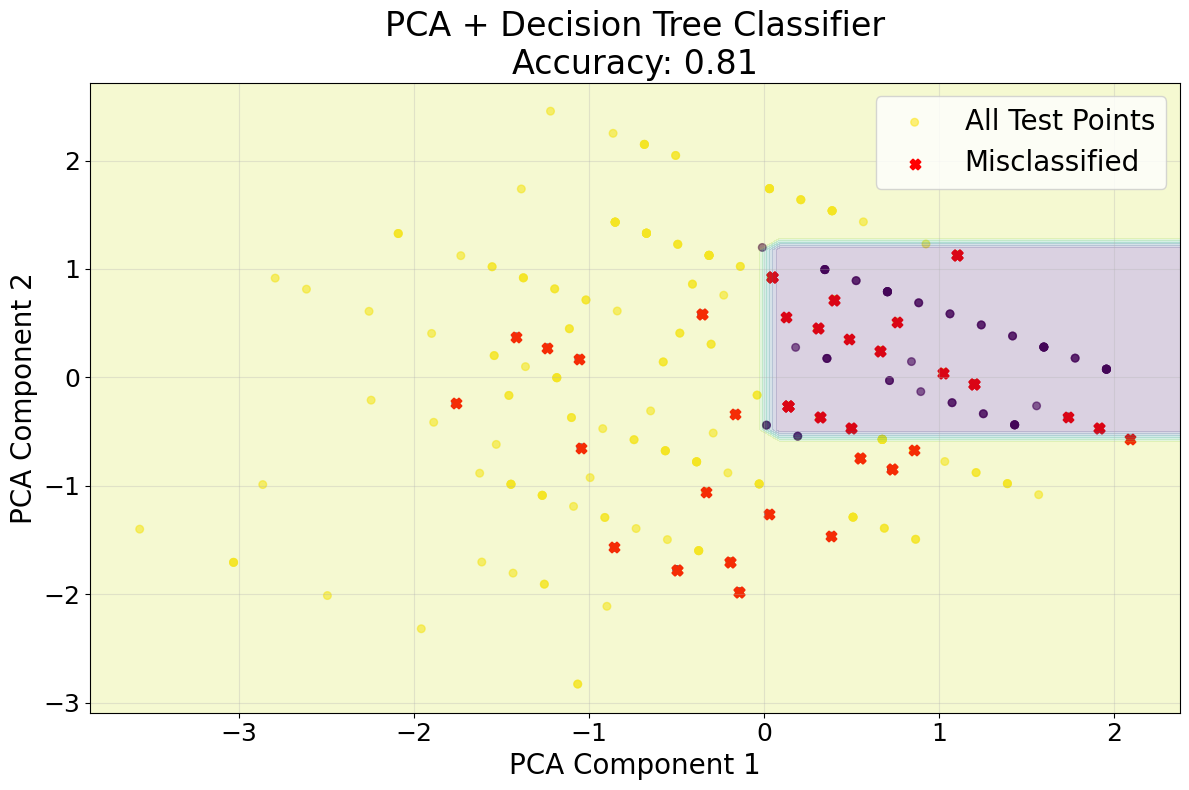

In [294]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

dc_vis = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

dc_vis.fit(X_train_pca, y_train)
y_pred_dc2 = dc_vis.predict(X_test_pca)  # for plotting


# --- Plotting ---
plt.figure(figsize=(12, 8))

# All test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test, cmap='viridis',
            alpha=0.6, s=30, label='All Test Points')

# Misclassified points
misclassified = y_pred_dc2 != y_test
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
            c='red', marker='X', s=50, linewidths=1.5, label='Misclassified')

# Decision boundary
xx, yy = np.meshgrid(np.linspace(*plt.xlim(), 50),
                     np.linspace(*plt.ylim(), 50))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = dc_vis.predict(grid_points).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Labels & aesthetics
plt.title(f"PCA + Decision Tree Classifier\nAccuracy: {accuracy_score(y_test, y_pred_dc2):.2f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


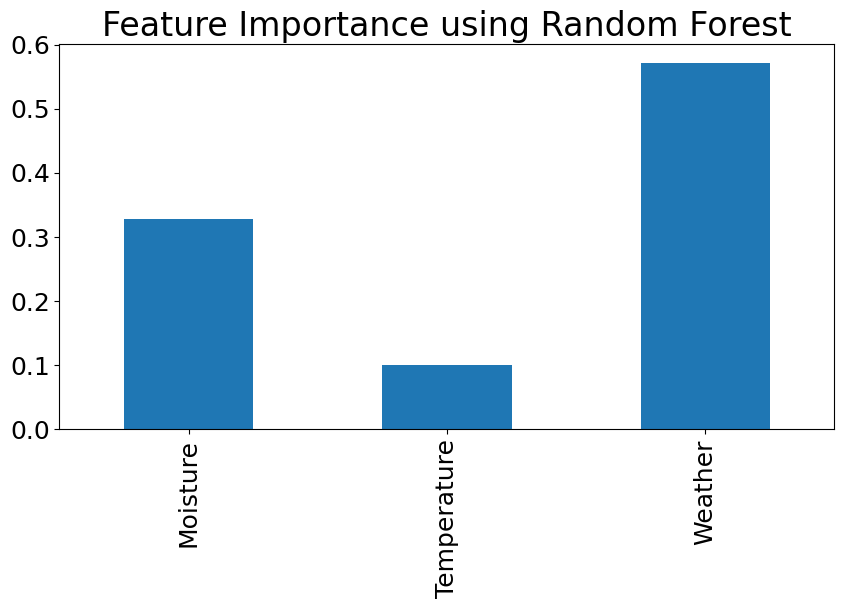

✅ Random Forest Accuracy: 0.92


In [295]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,    
    max_depth=3,   
    min_samples_split=4,
    min_samples_leaf=4,   
    criterion='entropy',     
    random_state=42
)
rf_model.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
importances = rf_model.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.plot.bar()
plt.title("Feature Importance using Random Forest")
plt.show()


y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest Accuracy: {accuracy_rf:.2f}")


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


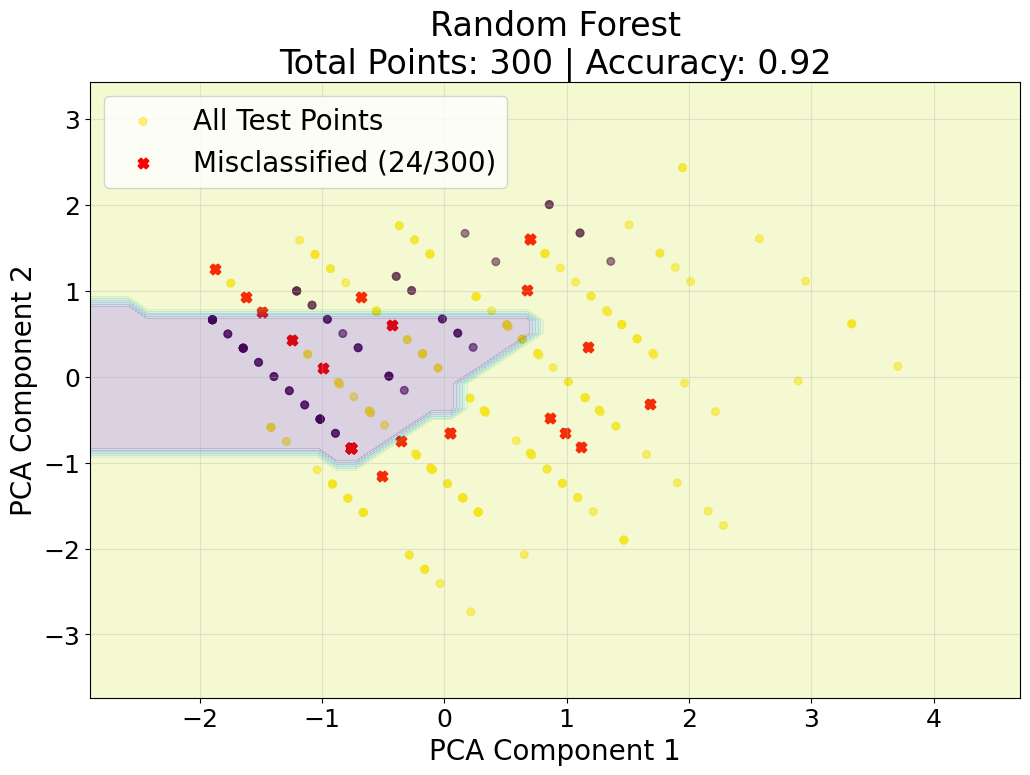

In [296]:
from sklearn.decomposition import PCA

X_test_array = np.asarray(X_test)
y_test_array = np.asarray(y_test)

# --- PCA for visualization ---
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_array)  # Only for plotting


# --- Create meshgrid in PCA space ---
xx, yy = np.meshgrid(np.linspace(X_test_pca[:, 0].min()-1, X_test_pca[:, 0].max()+1, 50),
                     np.linspace(X_test_pca[:, 1].min()-1, X_test_pca[:, 1].max()+1, 50))

# --- Transform back to original space for RF prediction ---
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_original = pca.inverse_transform(mesh_points)
Z = rf_model.predict(mesh_original).reshape(xx.shape)

# --- Plotting ---
plt.figure(figsize=(12, 8))

# 1. Plot all test points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
           c=y_test_array, cmap='viridis',
           alpha=0.6, s=30, label='All Test Points')

# 2. Highlight misclassifications
misclassified = y_pred_rf != y_test_array
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
           c='red', marker='X', s=50, linewidths=1.5,
           label=f'Misclassified ({sum(misclassified)}/{len(y_test)})')

# 3. Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Formatting
plt.xlim(X_test_pca[:, 0].min()-1, X_test_pca[:, 0].max()+1)
plt.ylim(X_test_pca[:, 1].min()-1, X_test_pca[:, 1].max()+1)
plt.title(f"Random Forest\nTotal Points: {len(X_test_pca)} | Accuracy: {accuracy_rf:.2f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

c:\Users\patil\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


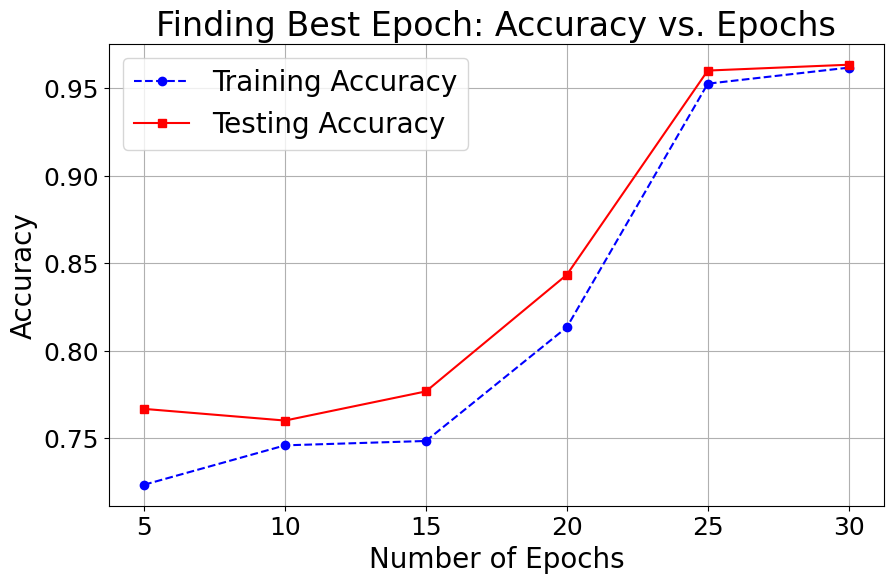

In [256]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Define different epochs for experimentation
epoch_values = [5, 10, 15, 20, 25, 30]  # Experiment with these values
train_accuracies = []
test_accuracies = []

X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Loop through different epochs and train model
for epochs in epoch_values:
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50),
        Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

    # Train model with current epoch count
    history = model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=10, validation_data=(X_test_lstm, y_test), verbose=0)

    # Get final training & testing accuracy
    train_accuracies.append(history.history["accuracy"][-1])
    test_accuracies.append(history.history["val_accuracy"][-1])

# Plot Epochs vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epoch_values, train_accuracies, marker="o", linestyle="--", color="blue", label="Training Accuracy")
plt.plot(epoch_values, test_accuracies, marker="s", linestyle="-", color="red", label="Testing Accuracy")

# Labels and Title
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Finding Best Epoch: Accuracy vs. Epochs")
plt.legend()
plt.grid(True)

# Show Plot
plt.show()


In [257]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau

X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


model_lstm = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.4),
    LSTM(64),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=['accuracy']
)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train model
history = model_lstm.fit(
    X_train_lstm,
    y_train,
    epochs=25,
    batch_size=16,
    validation_data=(X_test_lstm, y_test),
    callbacks=[reduce_lr]  
)

lstm_loss, lstm_acc = model_lstm.evaluate(X_test_lstm, y_test)
print(f"✅ LSTM Accuracy: {lstm_acc:.2f}")
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

model_lstm.save("irrigation_lstm.h5")

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6671 - loss: 0.6449 - val_accuracy: 0.7300 - val_loss: 0.5472 - learning_rate: 0.0010
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6937 - loss: 0.5533 - val_accuracy: 0.7667 - val_loss: 0.4960 - learning_rate: 0.0010
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7678 - loss: 0.4784 - val_accuracy: 0.8867 - val_loss: 0.2961 - learning_rate: 0.0010
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9278 - loss: 0.2497 - val_accuracy: 0.9633 - val_loss: 0.1594 - learning_rate: 0.0010
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9673 - loss: 0.1407 - val_accuracy: 0.9633 - val_loss: 0.1414 - learning_rate: 0.0010
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9696 - loss: 0.1431 - val_accuracy: 0.9533 - val_loss: 0.1373 - learning_rate: 0.0010
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9581 - loss: 0.1578 - val_ac

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Original X_test shape: (300, 3), Transformed X_test shape: (300, 2)
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


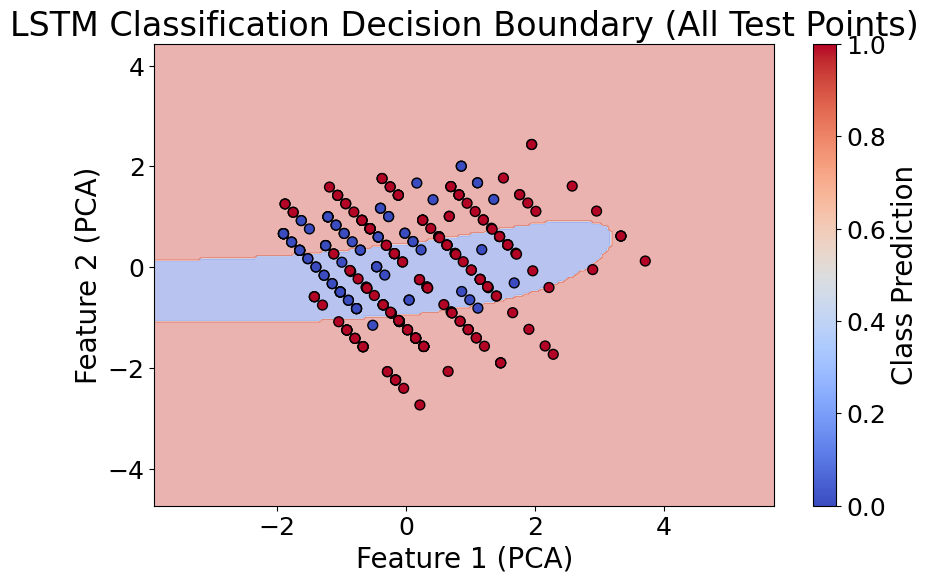

In [297]:

y_pred = model_lstm.predict(X_test_lstm)
y_pred_binary = (y_pred > 0.5).astype(int)

# ✅ Step 2: Reduce Data to 2D (If Needed)
if X_test.shape[1] > 2:  
    pca = PCA(n_components=2)  # Reduce to 2D for visualization
    X_test_2d = pca.fit_transform(X_test)
else:
    X_test_2d = X_test.values  # Use original data if already 2D

print(f"Original X_test shape: {X_test.shape}, Transformed X_test shape: {X_test_2d.shape}")

# ✅ Step 3: Create Meshgrid for Decision Boundary
x_min, x_max = X_test_2d[:, 0].min() - 2, X_test_2d[:, 0].max() + 2
y_min, y_max = X_test_2d[:, 1].min() - 2, X_test_2d[:, 1].max() + 2

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))  # Higher resolution

# ✅ Step 4: Predict on Grid Points for Decision Boundary
X_grid = np.c_[xx.ravel(), yy.ravel()]
if X_test.shape[1] > 2:
    X_grid = pca.inverse_transform(X_grid)  # Convert back to original space
X_grid = X_grid.reshape(-1, X_test.shape[1], 1)  # Reshape for LSTM input

Z = model_lstm.predict(X_grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)  # Convert to binary class labels

# ✅ Step 5: Plot Decision Boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")  # Background classification regions

# ✅ Step 6: Scatter Plot of Actual Test Points (All 300)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors="k", cmap="coolwarm", alpha=1.0, s=50)

# ✅ Step 7: Adjust Labels and Titles
plt.xlabel("Feature 1 (PCA)" if X_test.shape[1] > 2 else "Feature 1")
plt.ylabel("Feature 2 (PCA)" if X_test.shape[1] > 2 else "Feature 2")
plt.title("LSTM Classification Decision Boundary (All Test Points)")
plt.colorbar(label="Class Prediction")
plt.show()

In [298]:
multiple_inputs = np.array([
    [0.1, 0.4, 0.3, 0.2, 0.3],  
    [0.1, 0.6, 0.3, 0.8, 0.2]   
])

# Reshape for LSTM
multiple_inputs = multiple_inputs.reshape(multiple_inputs.shape[0], multiple_inputs.shape[1], 1)

# Predict
predictions = model_lstm.predict(multiple_inputs)
predicted_classes = [1 if p > 0.5 else 0 for p in predictions]

print("🔮 Predictions:", predictions.flatten())
print("🟢 Predicted Classes:", predicted_classes)
y_test.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
🔮 Predictions: [0.69198805 0.7581264 ]
🟢 Predicted Classes: [1, 1]


(300,)

In [129]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1",
                         solver="saga", 
                         C=5, 
                         l1_ratio=0.1, 
                         max_iter=15500, 
                         random_state=42)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"✅ Logistic Regression Accuracy: {accuracy_lr:.2f}")

✅ Logistic Regression Accuracy: 0.78


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


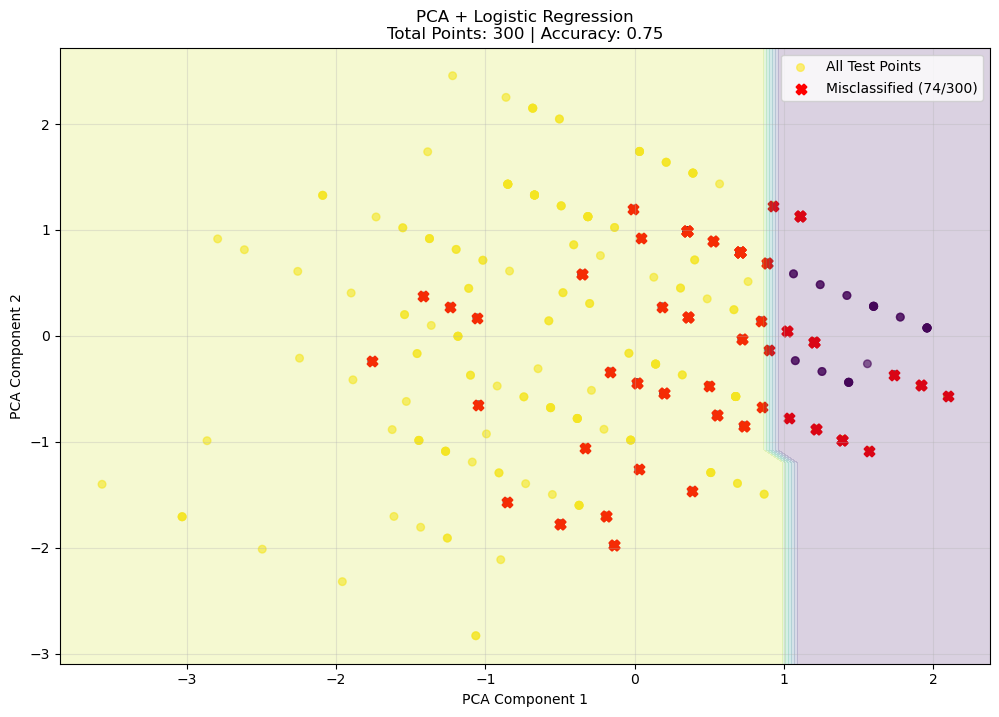

In [159]:
from sklearn.decomposition import PCA

# Ensure X_test and y_test are NumPy arrays
X_test_array = np.asarray(X_test)
y_test_array = np.asarray(y_test)

# PCA transformation (assuming PCA was applied to training data too)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)  # Fit PCA on training data
X_test_pca = pca.transform(X_test_array)  # Transform test data

# Train a logistic regression model
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)  # Train on PCA-transformed training data

# Predict on test data
y_pred = lr_pca.predict(X_test_pca)

# Plot setup
plt.figure(figsize=(12, 8))

# --- Plot all test points ---
scatter_all = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                          c=y_test_array, cmap='viridis', 
                          alpha=0.6, s=30, label='All Test Points')

# --- Highlight misclassified points ---
misclassified = y_pred != y_test_array
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1],
            c='red', marker='X', s=50, linewidths=1.5,
            label=f'Misclassified ({sum(misclassified)}/{len(y_test)})')

# --- Decision boundary ---
xx, yy = np.meshgrid(np.linspace(*plt.xlim(), 50),
                     np.linspace(*plt.ylim(), 50))
Z = lr_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Plot labels and title
plt.title(f"PCA + Logistic Regression\nTotal Points: {len(X_test_pca)} | Accuracy: {accuracy_score(y_test_array, y_pred):.2f}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

results = {}

models = {
    "XGBoost": y_pred_xgb,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_dc,
    "Logistic Regression": y_pred_lr,
    "K-Nearest Neighbors": y_pred_knn,
    "LSTM": y_pred_lstm,
}

# Compute metrics for each model
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    results[model_name] = {
        "Accuracy": (tp + tn) / (tp + tn + fp + fn),
        "True Positive (TP)": tp,
        "False Positive (FP)": fp,
        "True Negative (TN)": tn,
        "False Negative (FN)": fn
    }

# Convert dictionary to DataFrame for better display
results_df = pd.DataFrame(results).T

# Display results
print("\n==== Model Performance Report ====")
print(results_df)



==== Model Performance Report ====
                     Accuracy  True Positive (TP)  False Positive (FP)  \
XGBoost              0.963333               211.0                 10.0   
Random Forest        0.920000               211.0                 23.0   
Decision Tree        0.746667               152.0                 16.0   
Logistic Regression  0.776667               192.0                 47.0   
K-Nearest Neighbors  0.956667               206.0                  7.0   
LSTM                 0.963333               211.0                 10.0   

                     True Negative (TN)  False Negative (FN)  
XGBoost                            78.0                  1.0  
Random Forest                      65.0                  1.0  
Decision Tree                      72.0                 60.0  
Logistic Regression                41.0                 20.0  
K-Nearest Neighbors                81.0                  6.0  
LSTM                               78.0                  1.0  


In [139]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dc = dc.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")  # Convert LSTM probabilities to binary predictions

# Generate classification reports
print("="*50)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("="*50)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("="*50)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dc))
print("="*50)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("="*50)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("="*50)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))
print("="*50)

# Print all accuracies for comparison
print("\nModel Accuracy Comparison:")
print(f"XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Decision Tree: {accuracy_score(y_test, y_pred_dc):.4f}")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"K-Nearest Neighbors: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"LSTM: {accuracy_score(y_test, y_pred_lstm):.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93        88
           1       0.95      1.00      0.97       212

    accuracy                           0.96       300
   macro avg       0.97      0.94      0.95       300
weighted avg       0.96      0.96      0.96       300

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84        88
           1       0.90      1.00      0.95       212

    accuracy                           0.92       300
   macro avg       0.94      0.87      0.90       300
weighted avg       0.93      0.92      0.92       300

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.82      0.65        88
           1       0.90      0.72      0.80       212

    accuracy                         

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


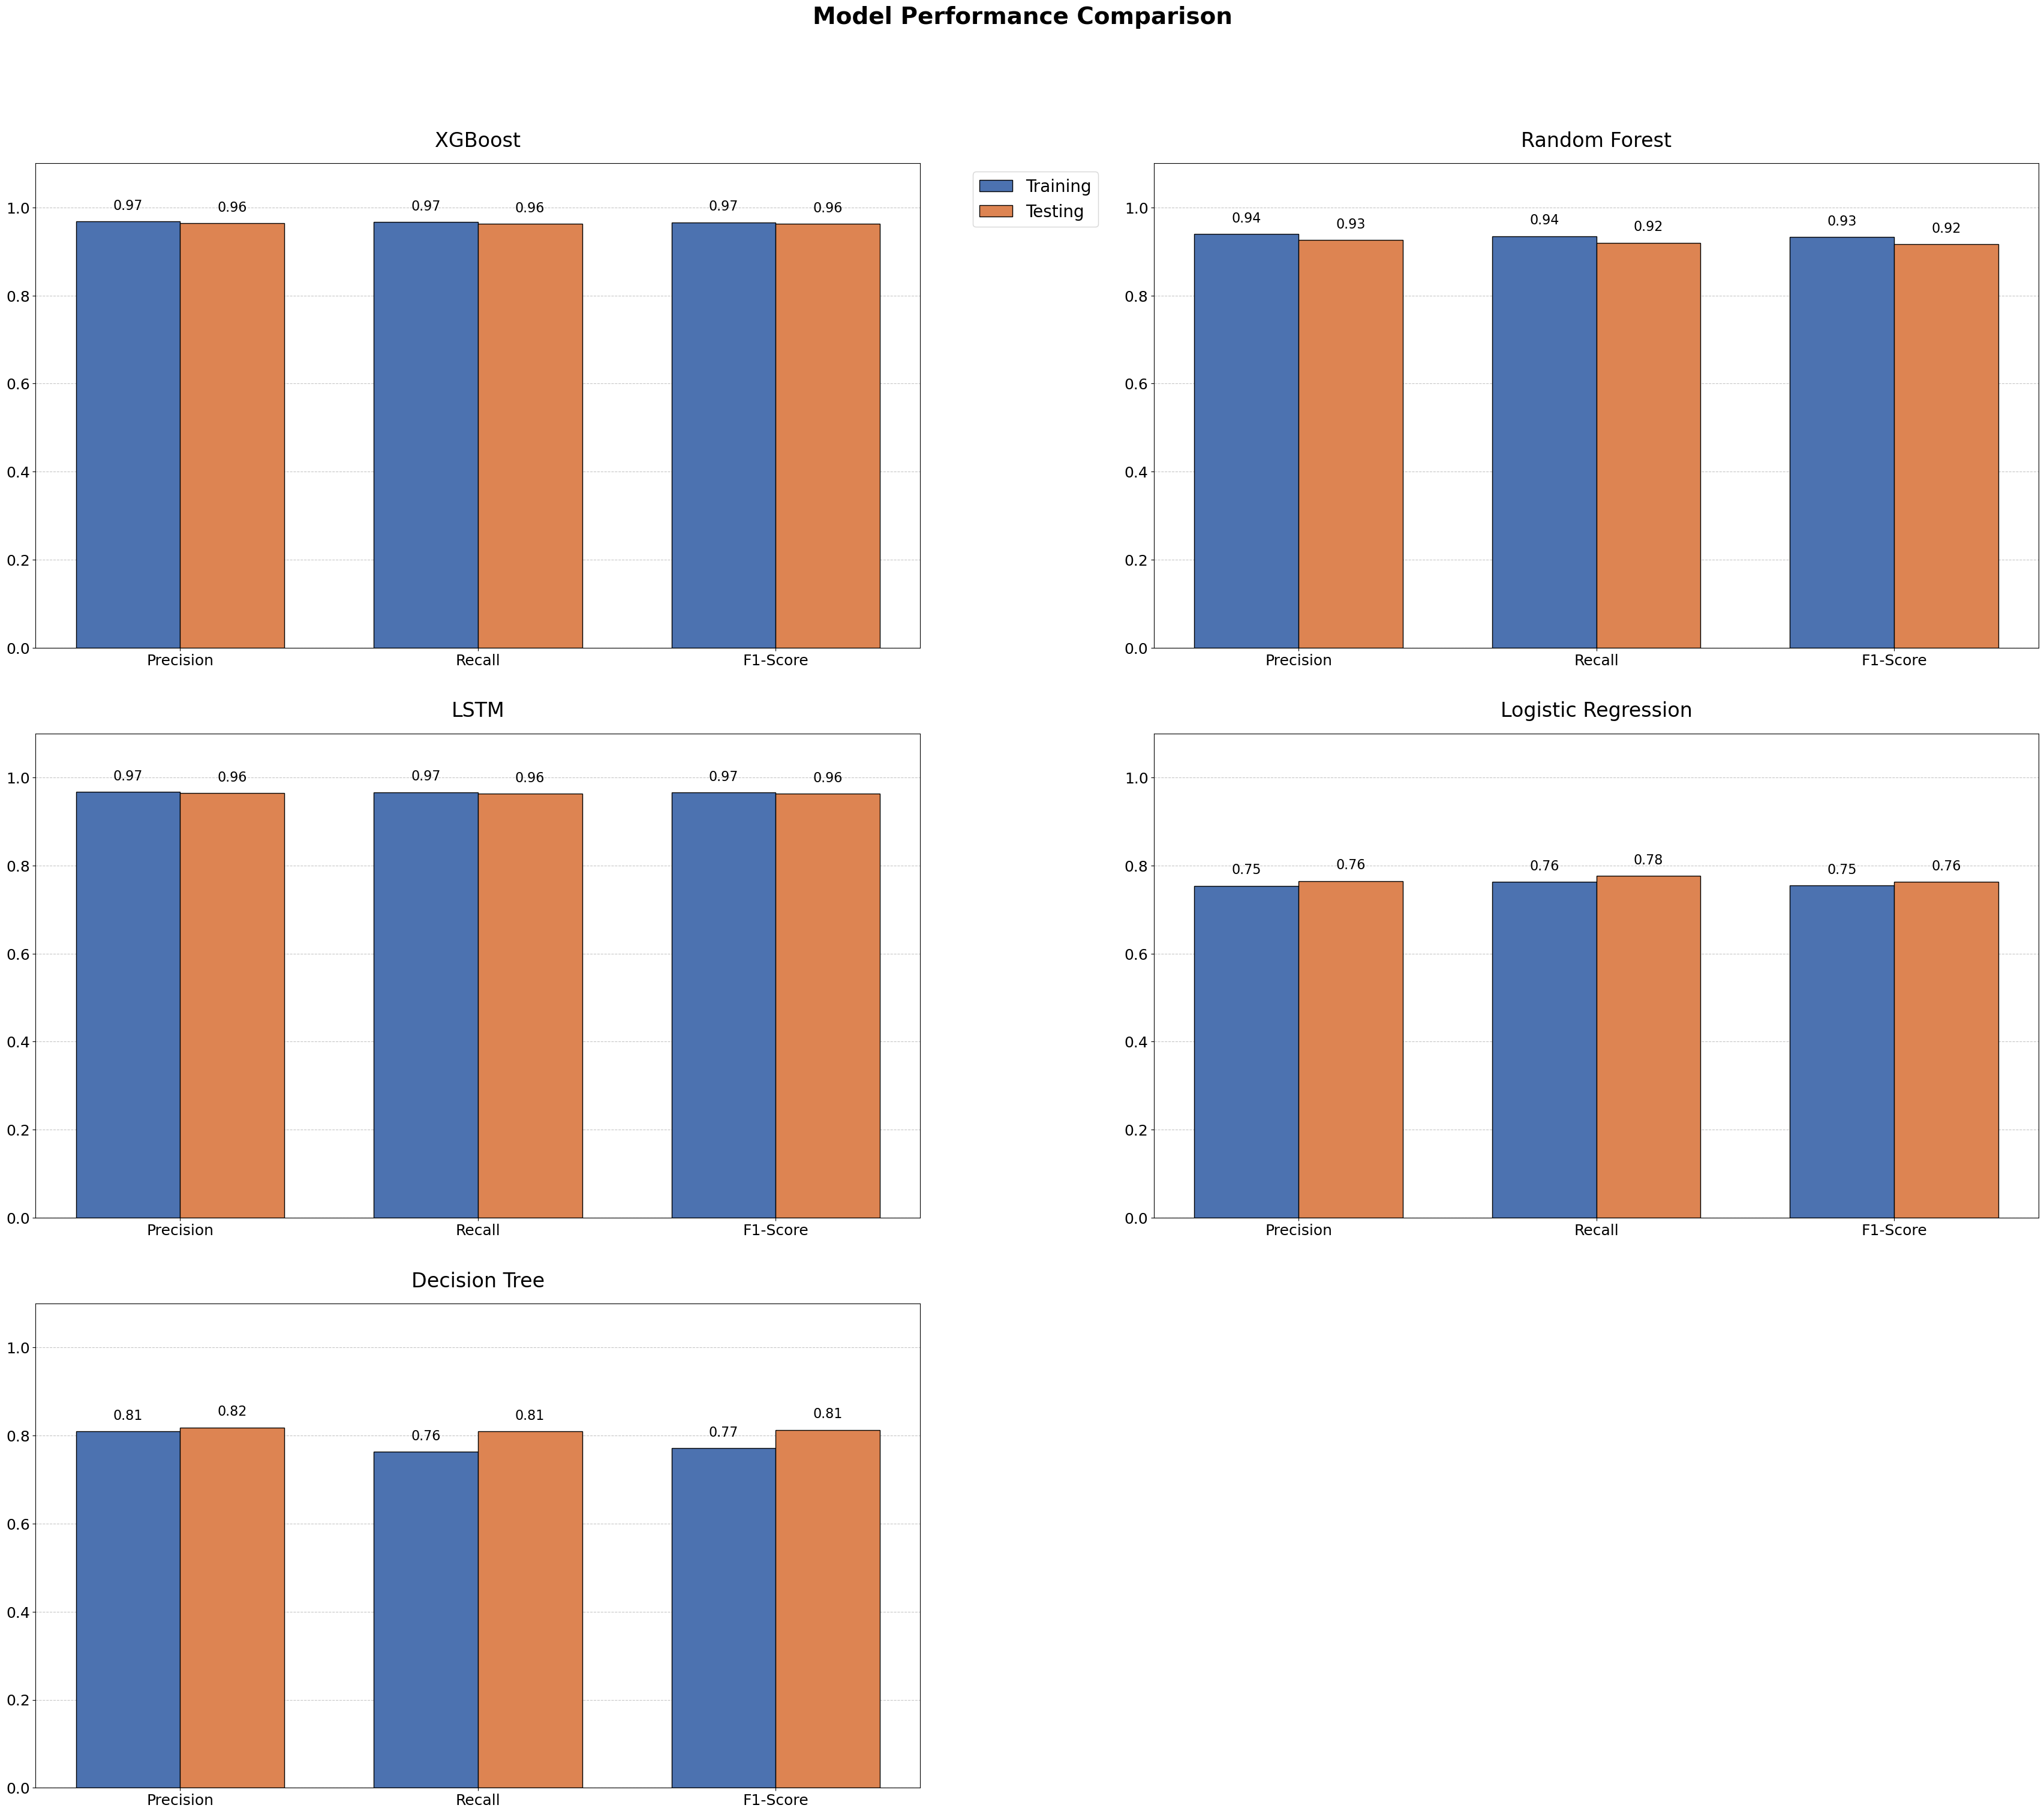

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

# Update global font sizes
plt.rcParams.update({
    'axes.titlesize': 24,
    'axes.labelsize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 20,
    'figure.titlesize': 28
})

# ✅ Updated models dictionary
models = {
    "XGBoost": (xgb_model.predict(X_train), y_pred_xgb),
    "Random Forest": (rf_model.predict(X_train), y_pred_rf),
    "LSTM": (
        model_lstm.predict(X_train_lstm).flatten() > 0.5, 
        model_lstm.predict(X_test_lstm).flatten() > 0.5
    ),
    "Logistic Regression": (lr.predict(X_train), y_pred_lr),
    "Decision Tree": (dc.predict(X_train), y_pred_dc2)  # ✅ Replaced KNN with Decision Tree
}

# Metrics
metrics = ["Precision", "Recall", "F1-Score"]

# Figure setup
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(35, 30))
fig.suptitle('Model Performance Comparison', y=1.02, fontweight='bold')
axes = axes.flatten()

colors = ["#4C72B0", "#DD8452"]

for idx, (model_name, (y_train_pred, y_test_pred)) in enumerate(models.items()):
    ax = axes[idx]
    
    train_report = classification_report(y_train, y_train_pred, output_dict=True, zero_division=0)
    test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
    
    train_scores = [train_report["weighted avg"][metric.lower()] for metric in metrics]
    test_scores = [test_report["weighted avg"][metric.lower()] for metric in metrics]
    
    x_indexes = np.arange(len(metrics))
    bar_width = 0.35
    
    train_bars = ax.bar(x_indexes - bar_width/2, train_scores, width=bar_width, 
                        label="Training", color=colors[0], edgecolor='black', linewidth=1)
    test_bars = ax.bar(x_indexes + bar_width/2, test_scores, width=bar_width, 
                       label="Testing", color=colors[1], edgecolor='black', linewidth=1)
    
    for bars in [train_bars, test_bars]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=16)
    
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(metrics, rotation=0)
    ax.set_ylim(0, 1.1)
    ax.set_title(model_name, pad=20)
    
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    
    if idx == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove empty subplot if needed
if len(models) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout(pad=4.0)
plt.show()


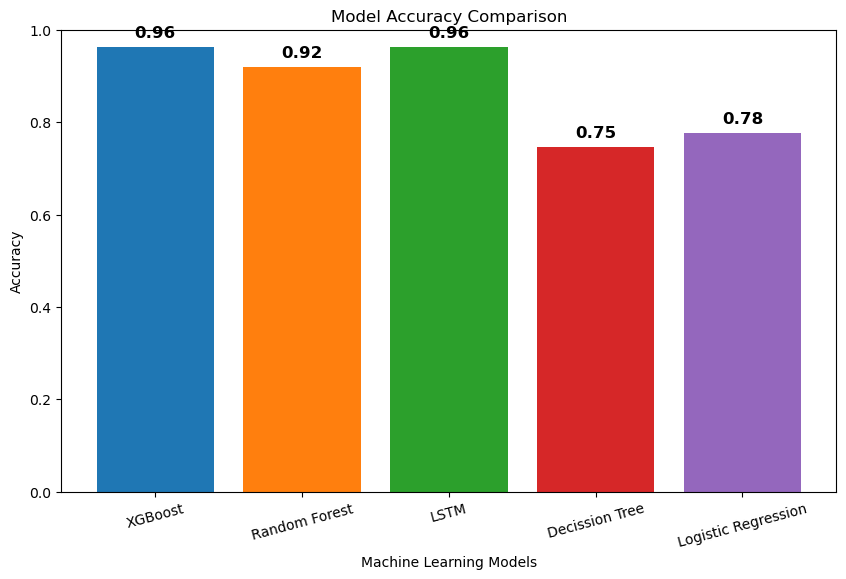

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values from your models
accuracies = {
    "XGBoost": accuracy,
    "Random Forest": accuracy_rf,
    "LSTM": lstm_acc,
    "Decission Tree" : accuracy_dc,
    "Logistic Regression": accuracy_lr,
}

# Extract model names and accuracy values
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Create bar chart
plt.figure(figsize=(10, 6))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Different colors for bars
plt.bar(model_names, accuracy_values, color=colors)

# Labels and title
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Models")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=15)

# Display values on top of bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

# Show plot
plt.show()


In [ ]:
import pickle

with open("label_encoder.pkl", "wb") as file:
    pickle.dump(le, file)
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
with open("outlier_limits.pkl", "wb") as file:
    pickle.dump(outlier_limits, file)


In [ ]:
y_pred_prob = model_lstm.predict(X_test_lstm)

y_pred = (y_pred_prob > 0.5).astype(int) 
y_pred 


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    